# Data Visualization

## Importing Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading US Trending Data

In [18]:
df = pd.read_csv("../data/US_youtube_trending_data.csv")
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234382,QH_P3HeXAJk,Anitta - Mil Veces (Official Music Video),2023-10-20T00:00:08Z,UCqjjyPUghDSSKFBABM_CXMw,Anitta,10,2023-10-26T00:00:00Z,Anitta|Melody|Funk|Pop|mil veces|anitta mil ve...,6325125,283273,0,38248,https://i.ytimg.com/vi/QH_P3HeXAJk/default.jpg,False,False,"Official music video for Anitta “Mil Veces”, a..."
234383,8lFTMaC0_9U,Ireland's incredible response to New Zealand H...,2023-10-14T19:37:01Z,UCE28rwYoaV7jvU6GVzdu_GQ,Rugby World Cup,17,2023-10-26T00:00:00Z,rugby|world rugby|rugby world cup|highlights|f...,2068273,5756,0,2092,https://i.ytimg.com/vi/8lFTMaC0_9U/default.jpg,False,False,Watch as Ireland stand defiant to New Zealand'...
234384,p9Vn_dnVDdQ,Minecraft but I become a PARKOUR PRO,2023-10-19T23:18:06Z,UC1HL3TABt6QGd_P857BH_CA,Evbo,20,2023-10-26T00:00:00Z,[None],804941,19881,0,1529,https://i.ytimg.com/vi/p9Vn_dnVDdQ/default.jpg,False,False,Minecraft but I become a PARKOUR PRO...the CRA...
234385,QdNc7s4J1Zw,Flight vs Cash Who Can Cook The Best Pizza?!,2023-10-19T23:19:57Z,UCvyTdLw8SkVmUcHYXSDEGwA,CashNasty,24,2023-10-26T00:00:00Z,[None],415249,20371,0,728,https://i.ytimg.com/vi/QdNc7s4J1Zw/default.jpg,False,False,Get 50% off your first order of CookUnity meal...


## Time to Trend from Published Date

Average Time to Trend: 3.07 days


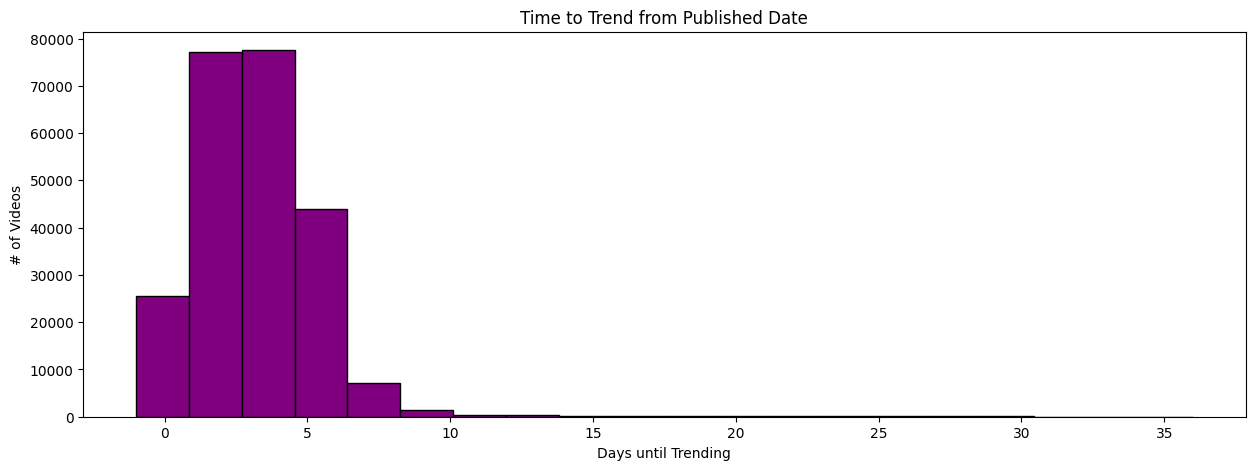

In [19]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%dT%H:%M:%SZ')
df['publishedAt'] = pd.to_datetime(df['publishedAt'], format='%Y-%m-%dT%H:%M:%SZ')
df['time_to_trend'] = (df['trending_date'] - df['publishedAt']).dt.days

# Calculating average time to trend
average_time_to_trend = df['time_to_trend'].mean()
print(f"Average Time to Trend: {average_time_to_trend:.2f} days")

plt.figure(figsize=(15, 5))
plt.hist(df['time_to_trend'], bins=20, color='purple', edgecolor='black')
plt.title('Time to Trend from Published Date')
plt.xlabel('Days until Trending')
plt.ylabel('# of Videos')
plt.show()

## \# of Videos with Comments Disabled

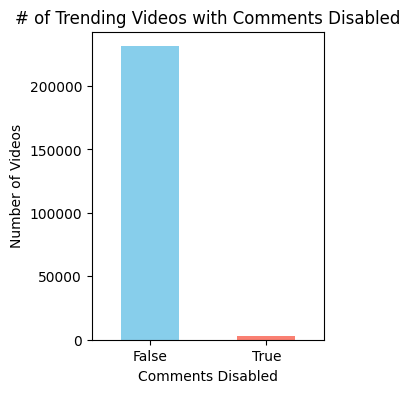

In [20]:
plt.figure(figsize=(3, 4))
df['comments_disabled'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('# of Trending Videos with Comments Disabled')
plt.xlabel('Comments Disabled')
plt.ylabel('Number of Videos')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.show()

## \# of Videos with Ratings Disabled

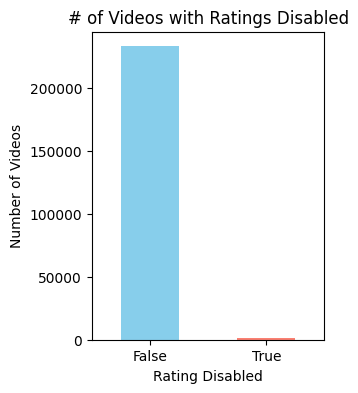

In [21]:
plt.figure(figsize=(3, 4))
df['ratings_disabled'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('# of Videos with Ratings Disabled')
plt.xlabel('Rating Disabled')
plt.ylabel('Number of Videos')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.show()

## \# of Videos by Published Hour

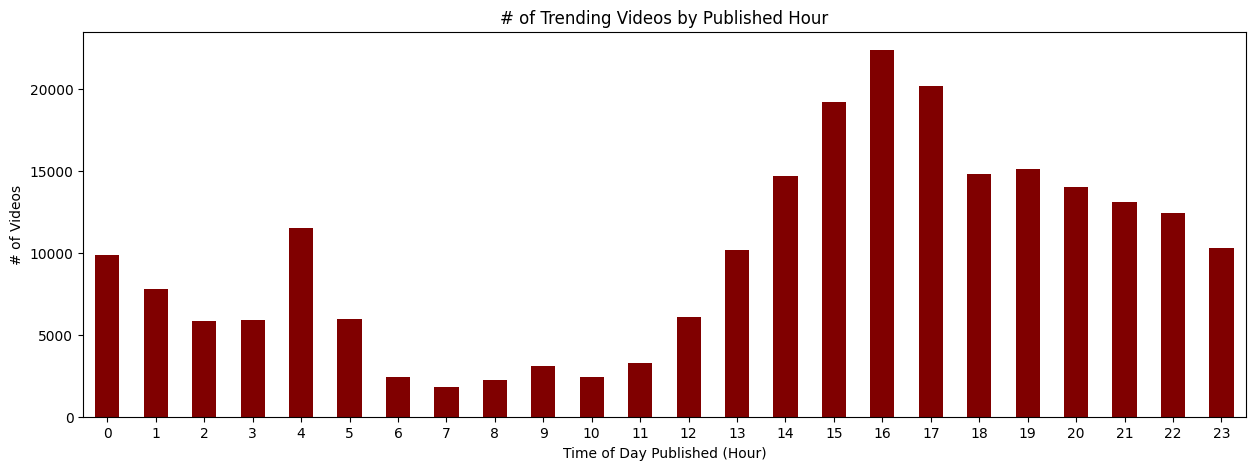

In [22]:
plt.figure(figsize=(15, 5))
trending_proportion_by_hour = df['publishedAt'].dt.hour.value_counts().sort_index()
trending_proportion_by_hour.plot(kind='bar', color='maroon')
plt.title('# of Trending Videos by Published Hour')
plt.xlabel('Time of Day Published (Hour)')
plt.ylabel('# of Videos')
plt.xticks(rotation=0)
plt.show()

## \# of Trending Videos per Category

This plot shows that this dataset is an imbalanced dataset. Many categories have a low amount or no videos in the trending dataset

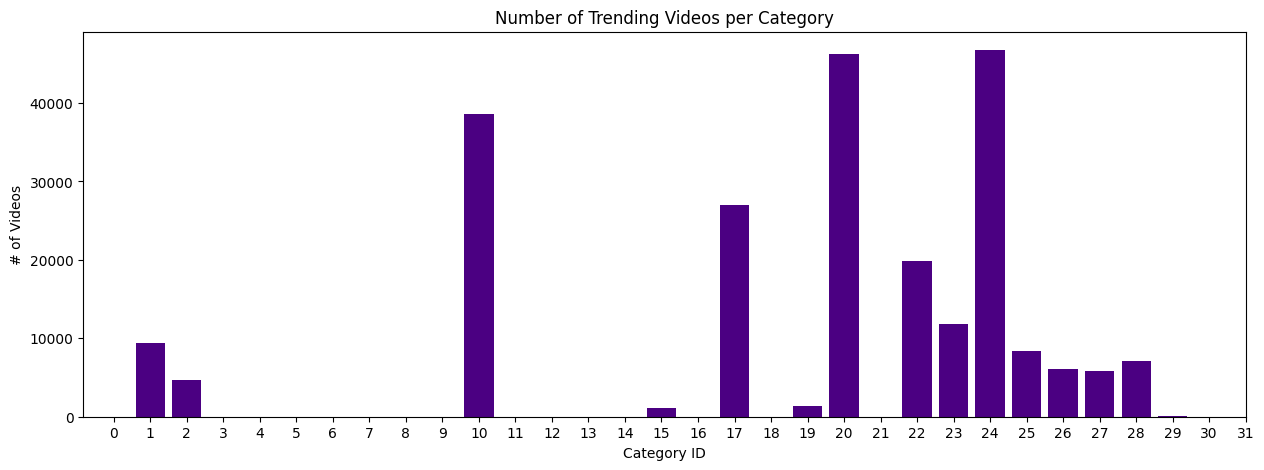

Categories:
0          Film & Animation
1          Autos & Vehicles
2                     Music
3            Pets & Animals
4                    Sports
5              Short Movies
6           Travel & Events
7                    Gaming
8             Videoblogging
9            People & Blogs
10                   Comedy
11            Entertainment
12          News & Politics
13            Howto & Style
14                Education
15     Science & Technology
16    Nonprofits & Activism
17                   Movies
18          Anime/Animation
19         Action/Adventure
20                 Classics
21                   Comedy
22              Documentary
23                    Drama
24                   Family
25                  Foreign
26                   Horror
27           Sci-Fi/Fantasy
28                 Thriller
29                   Shorts
30                    Shows
31                 Trailers
Name: Category, dtype: object


In [23]:
plt.figure(figsize=(15, 5))
category_counts = df['categoryId'].value_counts()
plt.bar(category_counts.index, category_counts.values, color='indigo')
plt.title('Number of Trending Videos per Category')
plt.xlabel('Category ID')
plt.ylabel('# of Videos')
plt.xticks(range(0, 32))
plt.show()

# Category Labels
category_json = pd.read_json("../data/US_category_id.JSON")
category_dict = [{'id': item['id'], 'title': item['snippet']['title']} for item in category_json['items']]
category_df = pd.DataFrame(category_dict)
categories = category_df.rename(index=str, columns = {"id":"Category_ID","title":"Category"})
categories.head(5)
print("Categories:")
print(categories.Category)

## Top 10 Most Viewed Channels in Trending

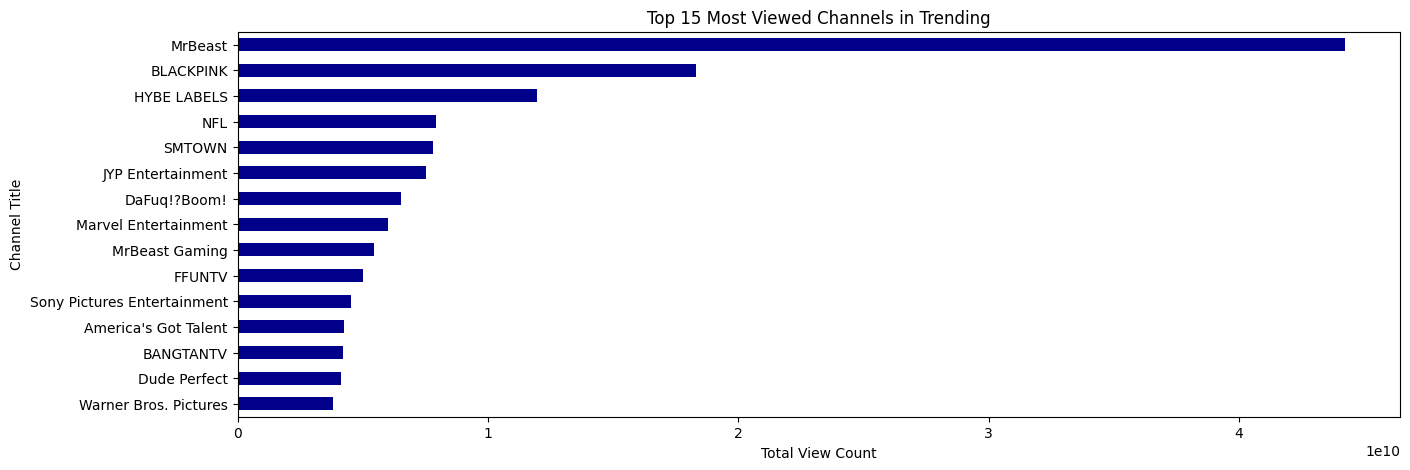

In [24]:
channel_views = df.groupby('channelTitle')['view_count'].sum().sort_values(ascending=False)
top_viewed_channels = channel_views[:15]
plt.figure(figsize=(15, 5))
top_viewed_channels.plot(kind='barh', color='darkblue')
plt.xlabel('Total View Count')
plt.ylabel('Channel Title')
plt.title('Top 15 Most Viewed Channels in Trending')
plt.gca().invert_yaxis()
plt.show()

## Top 10 Most Disliked Videos by Ratio in Trending

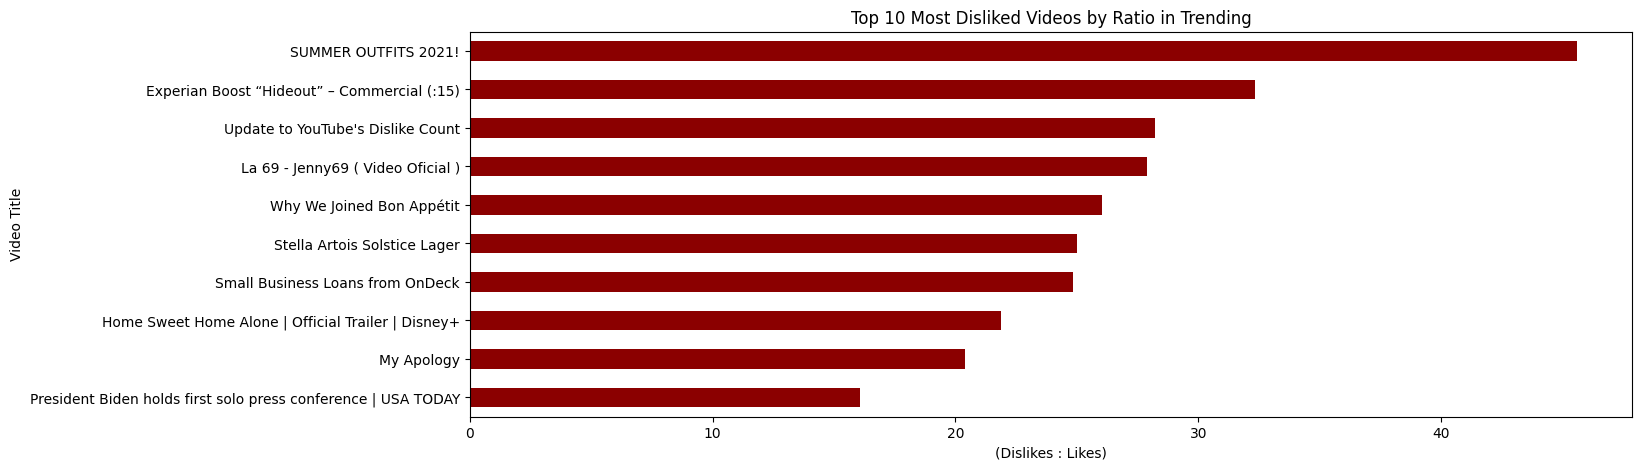

In [25]:
df['dislike_like_ratio'] = df['dislikes'] / (df['likes'] + 1) # Avoid division by zero
dislike_video = df.groupby('title')["dislike_like_ratio"].sum().sort_values(ascending=False)
top_disliked_channels = dislike_video[:10]
plt.figure(figsize=(15, 5))
top_disliked_channels.plot(kind='barh', color='#8b0000')
plt.xlabel('(Dislikes : Likes)')
plt.ylabel('Video Title')
plt.title('Top 10 Most Disliked Videos by Ratio in Trending')
plt.gca().invert_yaxis()
plt.show()